In [1]:
import pickle
import matplotlib.pyplot as plt
from tct.tct_force import TCTForceApply, TCTForceExtract
from shared.tct import tct_comp

In [2]:
with open("results/model_v07.pkl", "rb") as f:
    predictor = pickle.load(f)

In [ ]:
tct_real, tct_pred, error, bottom_half_nodes = tct_comp(TCTForceExtract, TCTForceApply, predictor)

In [ ]:
with open("sim_results_error_v07.pkl", "wb") as f:
    pickle.dump((tct_real, tct_pred, error, bottom_half_nodes), f)

In [ ]:
with open("sim_results_error_v07.pkl", "rb") as f:
    tct_real, tct_pred, error, bottom_half_nodes = pickle.load(f)

In [ ]:
tct_pred.post_process("u_y", "u", name="comparison_pred_v07")

error: XDG_RUNTIME_DIR is invalid or not set in the environment.
MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


In [ ]:
tct_real.post_process("u_y", "u", name="comparison_real_v07")

error: XDG_RUNTIME_DIR is invalid or not set in the environment.
MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


In [ ]:
tct_pred.post_process(tct_pred.plot_results["u"][:, :, 1] - tct_real.plot_results["u"][:, bottom_half_nodes, 1], "u", name="comparison_error_v07")

error: XDG_RUNTIME_DIR is invalid or not set in the environment.
MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


In [ ]:
error_mean = [abs(e).mean() for e in error]
error_mean_x = [abs(e[::2]).mean() for e in error]
error_mean_y = [abs(e[1::2]).mean() for e in error]

In [ ]:
error_mean = [e.mean() for e in error]
error_mean_x = [abs(e[::2]).mean() for e in error]
error_mean_y = [e[1::2].mean() for e in error]

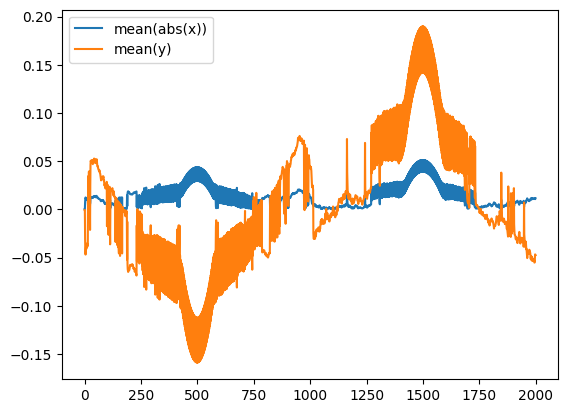

In [ ]:
plt.plot(error_mean_x)
plt.plot(error_mean_y)
plt.legend(["mean(abs(x))", "mean(y)"])
plt.show()